In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Haridwar.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Domino's Pizza,600,Pizza,Haridwar,Devpura,Quick Bites,11am to 11pm(Mon-Sun),Average,3.3,155
1,Om Fast Food,250,"Fast Food,Chinese,South Indian",Haridwar,Ranipur,Quick Bites,"11am to 1230AM(Mon),11am to 11pm(Tue-Sun)",Good,3.8,189
2,Spice N Nice,400,"South Indian,North Indian,Continental,Chinese",Haridwar,Jwalapur,Casual Dining,"11am to 1230AM(Mon),11am to 11pm(Tue-Sun)",Average,3.4,86
3,Sher E Punjab Hotel,350,"Indian,North Indian",Haridwar,Jwalapur,Dhaba,"11am to 4pm,7pm to 11pm(Mon-Fri),11am to 4pm...",Good,3.7,171
4,Shan A Punjab,300,"BBQ,Biryani,Indian,North Indian",Haridwar,Jwalapur,Casual Dining,"11am to 1130pm(Mon),11am to 11pm(Tue-Sun)",Good,3.5,129


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 10 columns):
Name                126 non-null object
Price               126 non-null int64
Cuisine_Category    126 non-null object
City                126 non-null object
Region              126 non-null object
Cuisine_Type        126 non-null object
Timing              126 non-null object
Rating_Types        126 non-null object
Rating              126 non-null float64
Votes               126 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 9.9+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,126.000000,126.000000,126.000000
mean,331.428571,3.342857,31.817460
std,164.874324,0.139959,35.121367
min,100.000000,3.200000,4.000000
25%,200.000000,3.200000,8.250000
50%,300.000000,3.300000,19.000000
75%,400.000000,3.400000,40.750000
max,1000.000000,3.800000,189.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              0
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Om Dhaba & Caters    3
Punjabi Tadka        2
Cakes & Bakes        2
Indo-Mughal          2
Brown Hut            2
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

BHEL Township                        36
Ranipur                              30
Jwalapur                             24
Har Ki Pauri                         13
Kankhal                              11
Devpura                              10
The Pentagon Mall-- BHEL Township     1
Sitapur                               1
Name: Region, dtype: int64

Text(0.5,1,'Region')

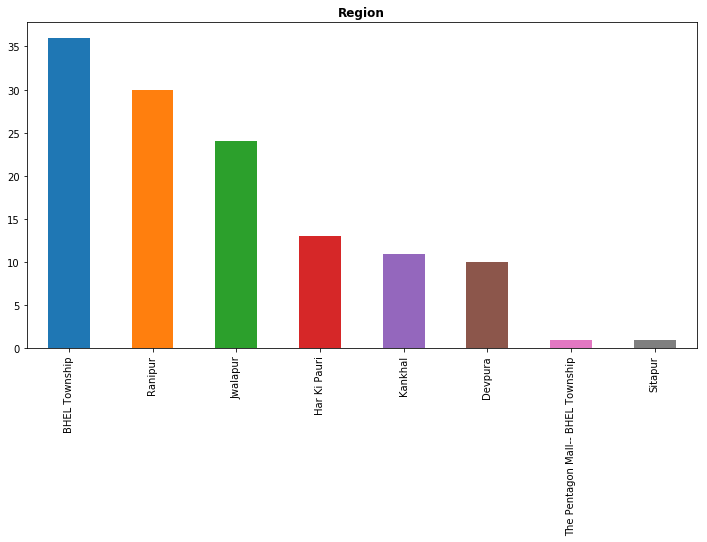

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

ValueError: 'explode' must be of length 'x'

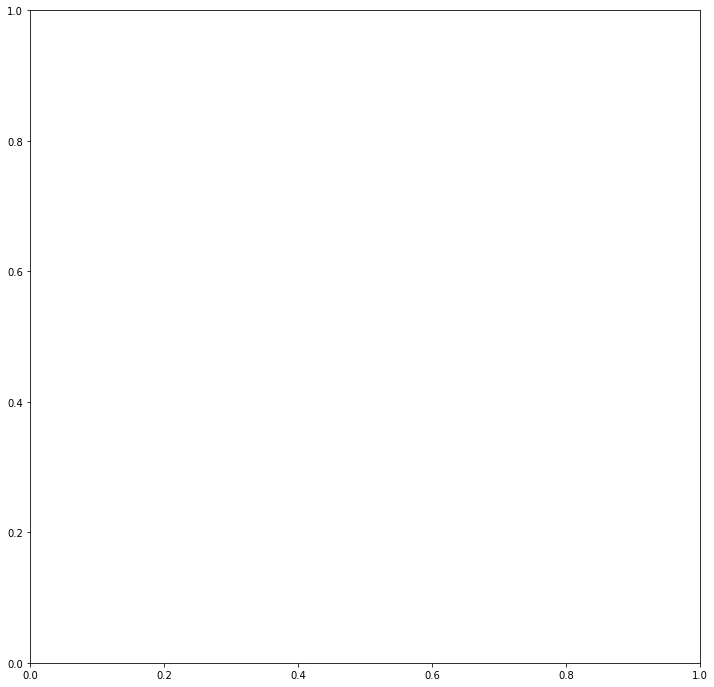

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average    97
Good       29
Name: Rating_Types, dtype: int64

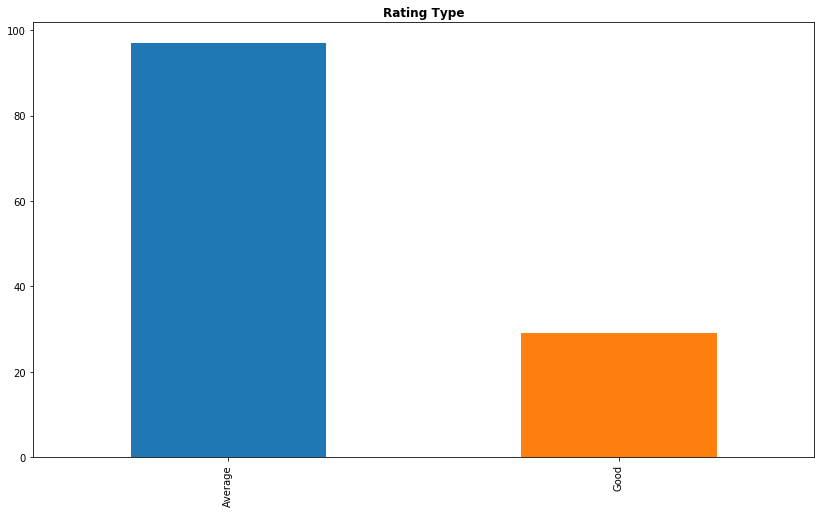

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       44
Casual Dining     39
Bakery            10
Bhojanalya         6
Dhaba              6
Café               5
Sweet Shop         4
Kiosk              3
Beverage Shop      3
Dessert Parlor     2
Name: Cuisine_Type, dtype: int64

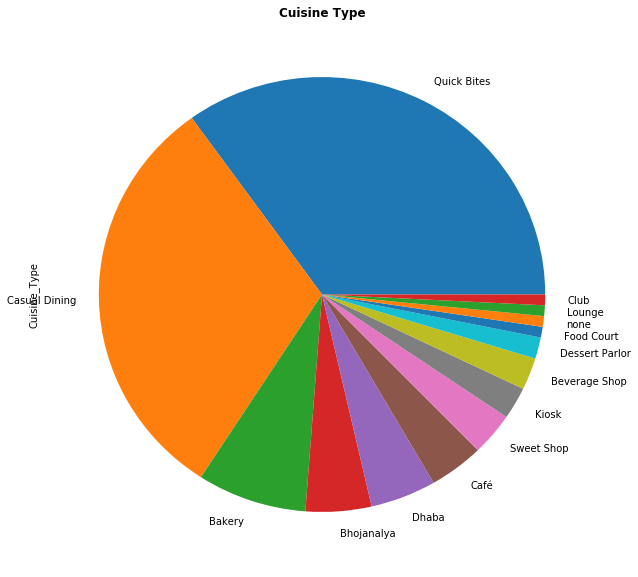

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [16]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [17]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [18]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.342857142857143


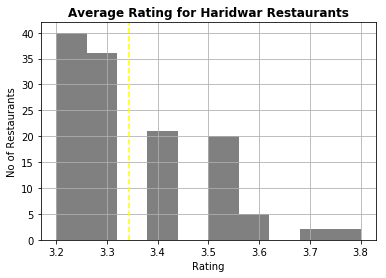

In [19]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Haridwar Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [20]:
#Average rating per restaurant in Dehradun is found to be around 3.34

# Top cuisines in Haridwar

In [21]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

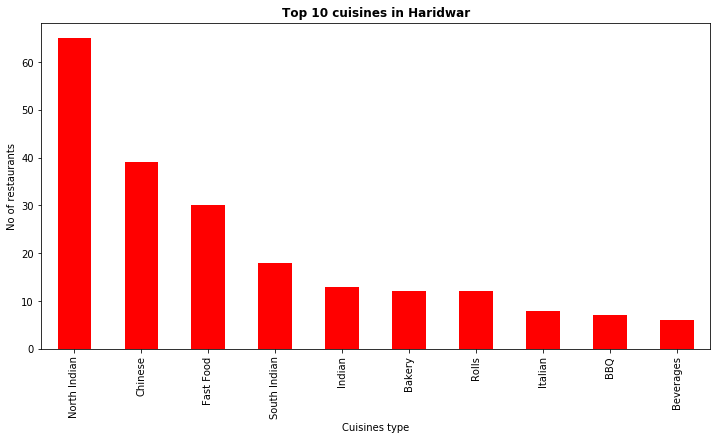

In [22]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Haridwar',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [23]:
data['Price'].value_counts()[:20]

250     21
200     19
350     14
150     14
300     13
400     13
500     11
600      8
800      3
100      2
450      2
120      1
700      1
160      1
1000     1
550      1
280      1
Name: Price, dtype: int64

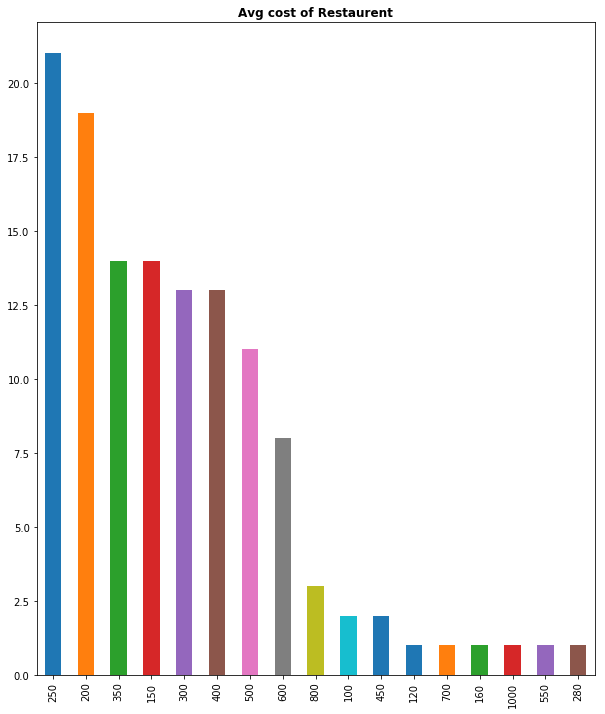

In [24]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [25]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

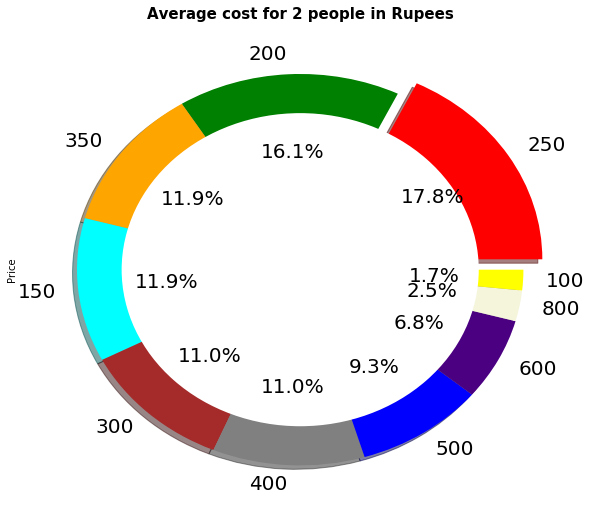

In [26]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 250